# advanced_layout_analyzer.py 테스트 과정

배포된 베이스라인 코드를 클론합니다.

In [1]:
!git clone -b feature/min https://github.com/MJHolics/sprint_03_rfp-rag.git
!ls

Cloning into 'sprint_03_rfp-rag'...
remote: Enumerating objects: 227, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (129/129), done.
remote: Total 227 (delta 51), reused 160 (delta 46), pack-reused 49 (from 1)
Receiving objects: 100% (227/227), 1.82 MiB | 612.00 KiB/s, done.
Resolving deltas: 100% (55/55), done.
sample_data  sprint_03_rfp-rag


필요한 환경을 설정합니다.

In [2]:
%cd sprint_03_rfp-rag
!pip install -r requirements.txt

/content/sprint_03_rfp-rag
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 119.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 127.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 156.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 103.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 131.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
!pip install olefile pillow openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 5.7 MB/s eta 0:00:00


In [4]:
!pip install easyocr pytesseract

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 47.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 963.8/963.8 kB 71.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.1/292.1 kB 35.8 MB/s eta 0:00:00


data 폴더를 만들고 우선 pdf 파일(고려대학교_차세대 포털·학사 정보시스템 구축사업.pdf)을 하나 업로드합니다.

In [5]:
import os

# sprint_03_rfp-rag 폴더 안에 data 폴더 생성
data_dir = './data'
os.makedirs(data_dir, exist_ok=True)

print(f"'{data_dir}' 폴더가 생성되었습니다.")

'./data' 폴더가 생성되었습니다.


advanced_layout_analyzer에서 AdvancedLayoutAnalyzer클래스의 인스턴스를 생성합니다.

In [6]:
import importlib
import src.processors.advanced_layout_analyzer

importlib.reload(src.processors.advanced_layout_analyzer)

# 이제 advanced_layout_analyzer 모듈의 변경 사항이 반영됩니다.
# 이 셀을 실행한 후에 AdvancedLayoutAnalyzer 클래스를 다시 인스턴스화하거나
# 해당 모듈의 함수를 호출하면 수정된 코드가 적용됩니다.

<module 'src.processors.advanced_layout_analyzer' from '/content/sprint_03_rfp-rag/src/processors/advanced_layout_analyzer.py'>

In [7]:
analyzer = src.processors.advanced_layout_analyzer.AdvancedLayoutAnalyzer()

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% CompleteEasyOCR 초기화 완료 (한글/영어)
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 213MB/s]


CNN 모델 (ResNet50) 초기화 완료


data 폴더 안에 고려대학교_차세대 포털·학사 정보시스템 구축사업.pdf 파일을 업로드하고 analyze_document_advanced 메써드를 실행해서 page_layouts를 생성한 후 확인해보니 PageLayout 안에 element가 찾아지지 않았습니다.

In [8]:
page_layouts = analyzer.analyze_document_advanced("./data/고려대학교_차세대 포털·학사 정보시스템 구축사업.pdf")

In [9]:
page_layouts

[PageLayout(page_number=1, elements=[], reading_order=[], columns=1, layout_type='empty'),
 PageLayout(page_number=2, elements=[], reading_order=[], columns=1, layout_type='empty'),
 PageLayout(page_number=3, elements=[], reading_order=[], columns=1, layout_type='empty'),
 PageLayout(page_number=4, elements=[], reading_order=[], columns=1, layout_type='empty'),
 PageLayout(page_number=5, elements=[], reading_order=[], columns=1, layout_type='empty')]

이제부터 analyze_document_advanced 메써드의 코드들을 직접 실행해보겠습니다.

먼저 파일의 라이브러리들을 불러옵니다.

In [10]:
"""
실제 CNN 기반 문서 레이아웃 분석 시스템
YOLO + OCR + 규칙 기반 분석의 조합
"""

import cv2
import numpy as np
from typing import Dict, List, Any, Tuple, Optional
import pandas as pd
from pathlib import Path
import json
from dataclasses import dataclass
import fitz  # PyMuPDF
import math

# OCR 라이브러리들
try:
    import easyocr
    import pytesseract
    from PIL import Image, ImageEnhance, ImageFilter
    EASYOCR_AVAILABLE = True
except ImportError:
    print("EasyOCR/Tesseract 미설치: pip install easyocr pytesseract")
    EASYOCR_AVAILABLE = False

# 딥러닝 모델
try:
    import torch
    import torchvision.transforms as transforms
    from torchvision.models import resnet50, ResNet50_Weights
    TORCH_AVAILABLE = True
except ImportError:
    print("PyTorch 미설치: pip install torch torchvision")
    TORCH_AVAILABLE = False

4 페이지(page_num=3)의 문서를 analyze합니다.

In [11]:
page_num = 3

import fitz
doc = fitz.open("./data/고려대학교_차세대 포털·학사 정보시스템 구축사업.pdf")
page = doc[page_num]

# 페이지를 이미지로 변환
mat = fitz.Matrix(2.0, 2.0)  # 2배 확대로 해상도 향상
pix = page.get_pixmap(matrix=mat)
img_data = pix.tobytes("png")

# 페이지를 이미지로 변환
mat = fitz.Matrix(2.0, 2.0)  # 2배 확대로 해상도 향상
pix = page.get_pixmap(matrix=mat)
image = pix.tobytes("png")

4 페이지를 png 파일로 바꾸는 코드까지를 실행하고 아래와 같이 출력해봅니다.

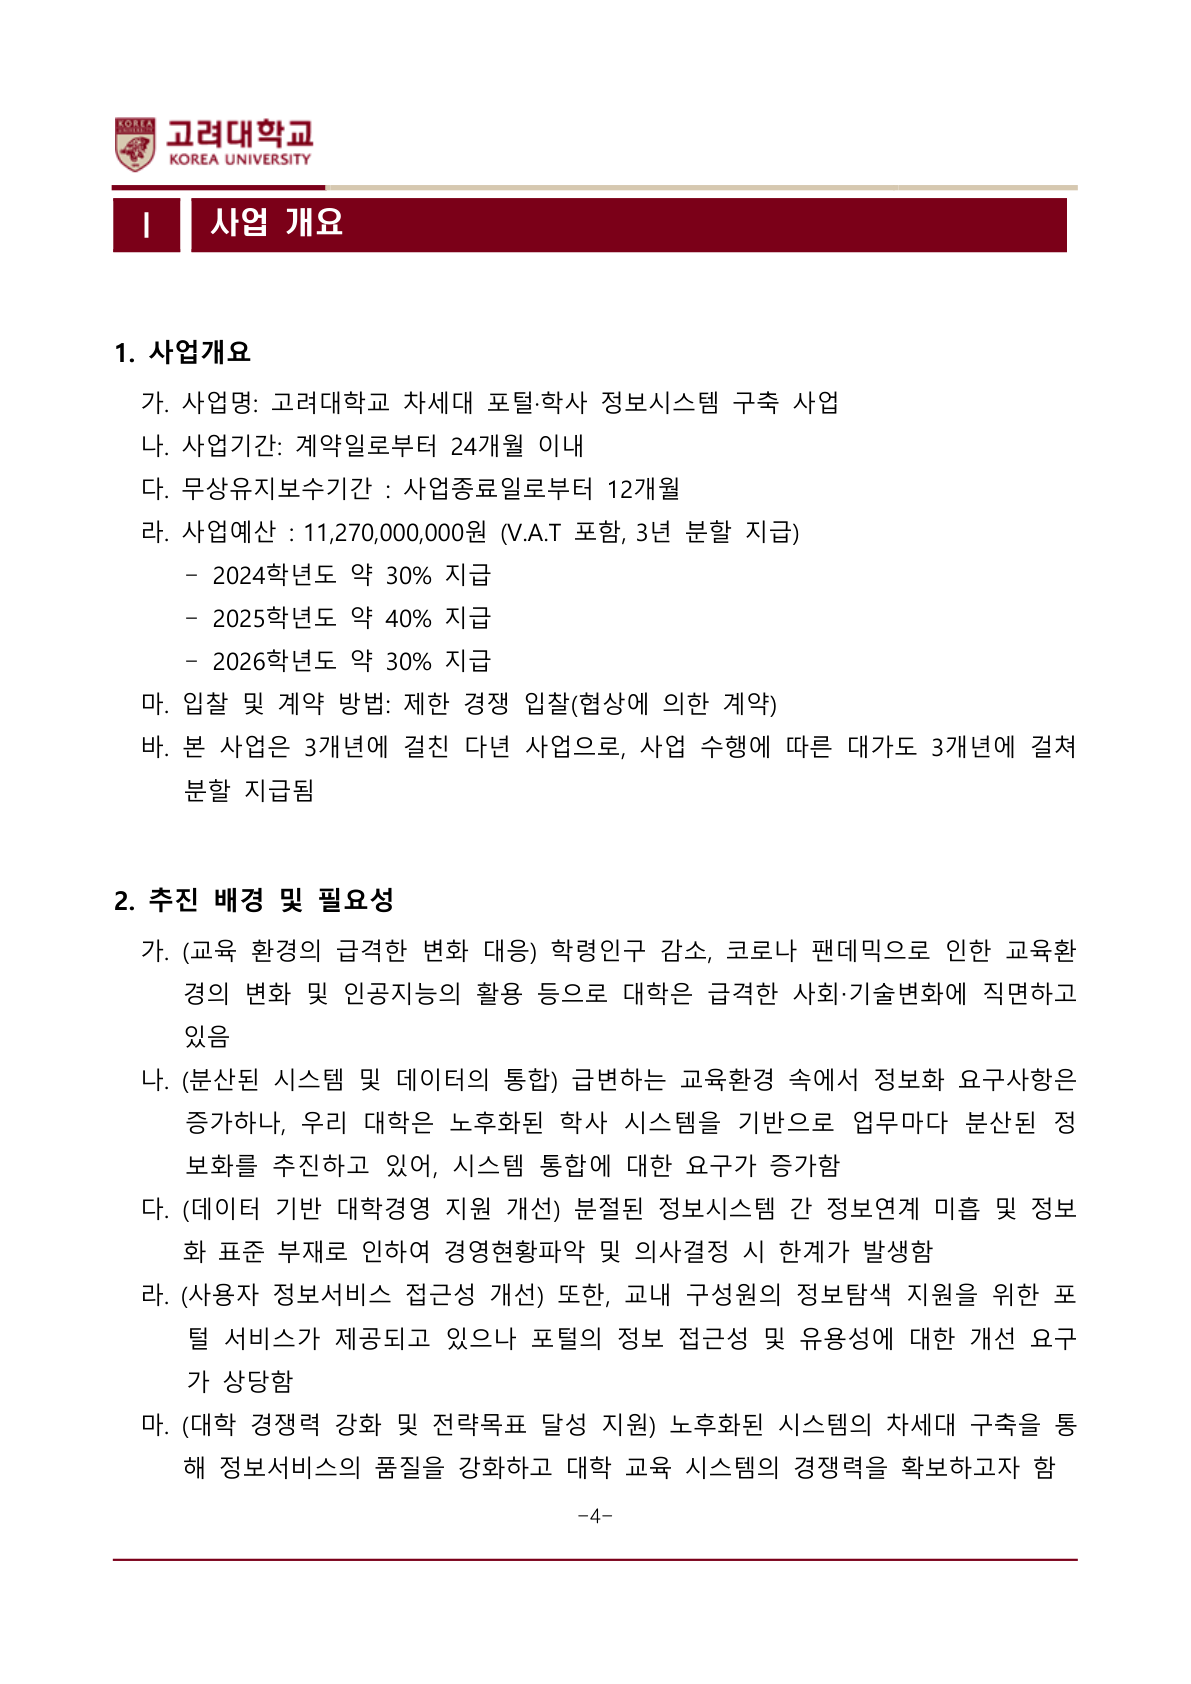

In [12]:
from IPython.display import display, Image

# PNG 이미지 데이터를 사용하여 Image 객체 생성 및 표시
display(Image(data=image, format='png'))

# 만약 파일 경로가 있다면 다음과 같이 사용할 수 있습니다.
# display(Image(filename='/path/to/your/image.png'))

dilated 객체까지 생성하는 코드를 실행합니다.

In [13]:
# OpenCV 이미지로 변환
nparr = np.frombuffer(img_data, np.uint8)
image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. 적응형 임계값으로 이진화
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, 2)
#binary = cv2.bitwise_not(binary)  ###

# 2. 모폴로지 연산으로 텍스트 블록 찾기
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 3))
dilated = cv2.dilate(binary, kernel, iterations=2)

생성된 binary 객체를 출력해봅니다. 잘 변환이 되었음을 확인할 수 있습니다.

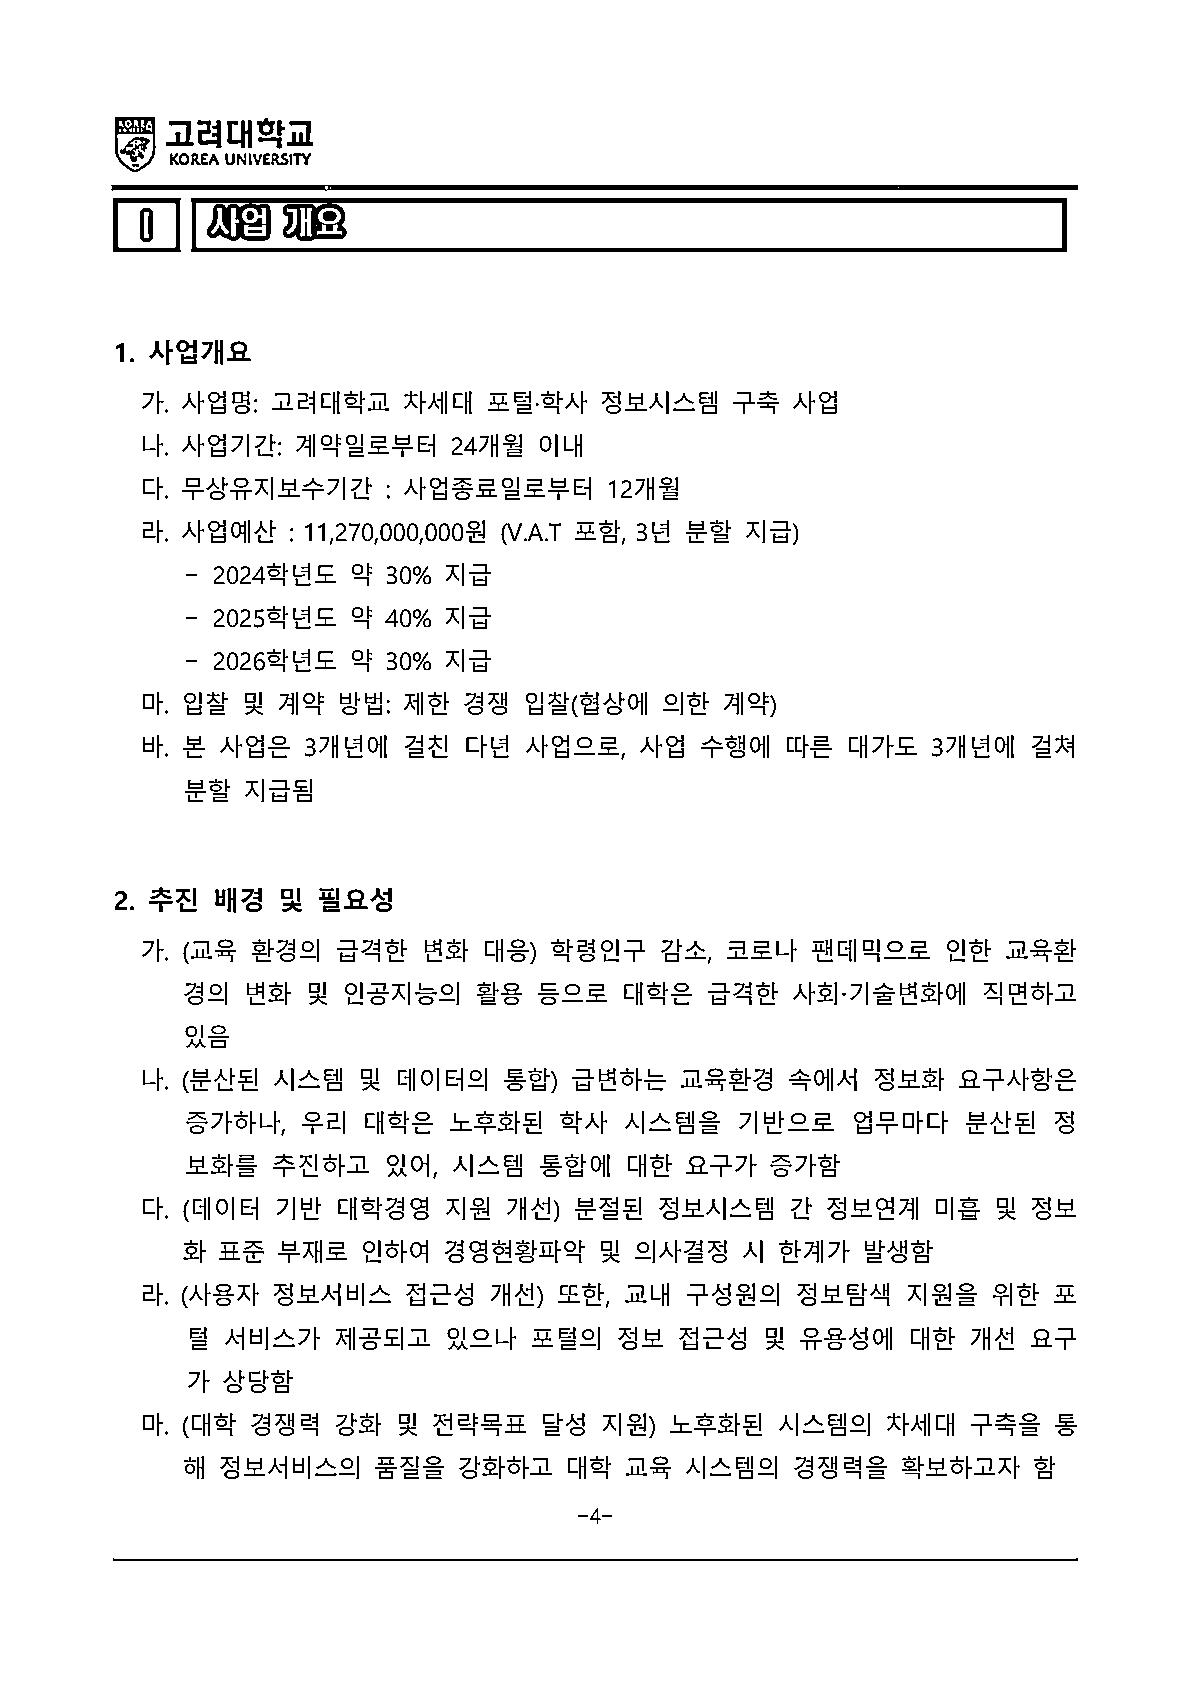

In [14]:
import cv2
import numpy as np
from IPython.display import display, Image

# OpenCV 이미지를 PNG 형식으로 인코딩
is_success, im_buf_arr = cv2.imencode(".png", binary)
if is_success:
    byte_im = im_buf_arr.tobytes()

    # PNG 이미지 데이터를 사용하여 Image 객체 생성 및 표시
    display(Image(data=byte_im, format='png'))
else:
    print("이미지 인코딩에 실패했습니다.")

dilated 이미지를 png 형식으로 출력해봅니다. 하얀색의 빈 페이지가 나왔습니다.

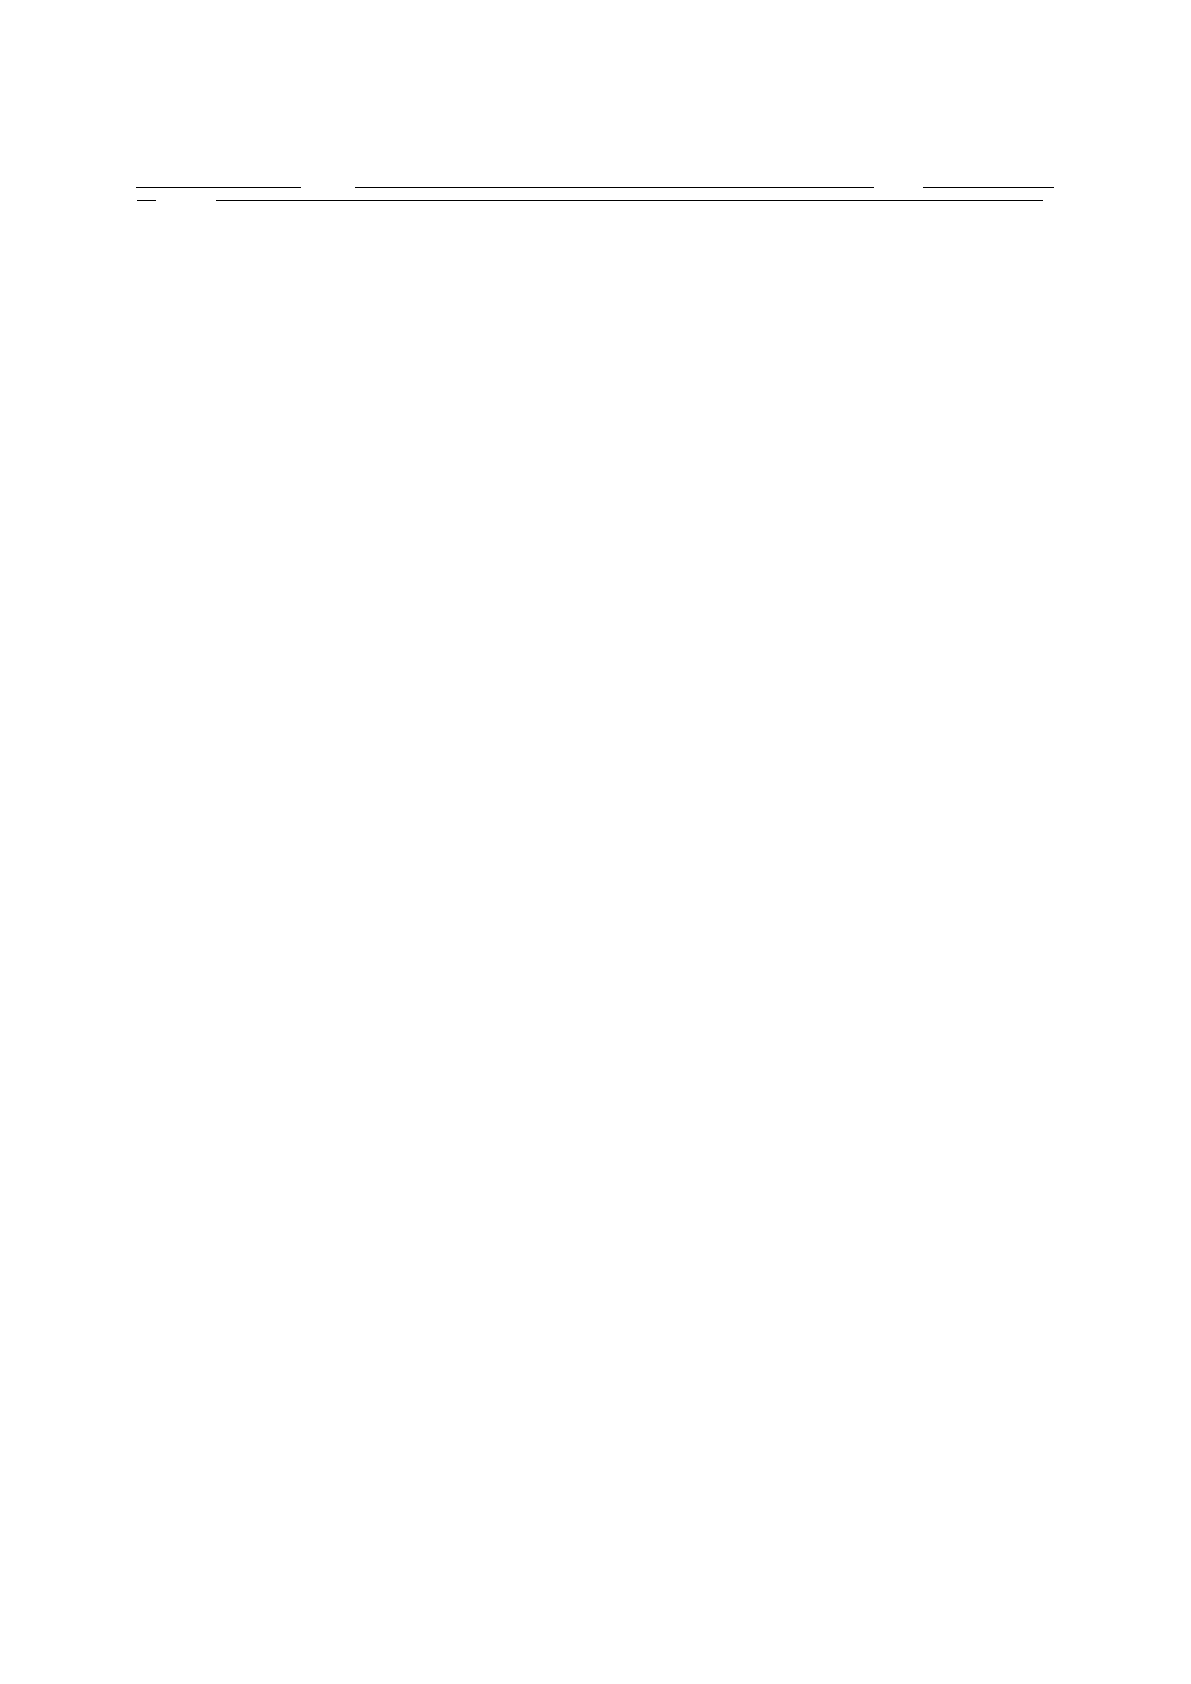

In [15]:
# OpenCV 이미지를 PNG 형식으로 인코딩
is_success, im_buf_arr = cv2.imencode(".png", dilated)
if is_success:
    byte_im = im_buf_arr.tobytes()

    # PNG 이미지 데이터를 사용하여 Image 객체 생성 및 표시
    display(Image(data=byte_im, format='png'))
else:
    print("이미지 인코딩에 실패했습니다.")

찾아보니 cv2.dilate 함수는 흰색 픽셀(255)을 확장하는 함수라고 합니다. 따라서 binary를 아래와 같이 흑백 반전하는 코드를 추가한 후 dilate을 생성합니다.

In [16]:
# OpenCV 이미지로 변환
nparr = np.frombuffer(img_data, np.uint8)
image = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 1. 적응형 임계값으로 이진화
binary = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                cv2.THRESH_BINARY, 11, 2)
binary = cv2.bitwise_not(binary)  #추가한 흑백 반전 코드

# 2. 모폴로지 연산으로 텍스트 블록 찾기
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 3))
dilated = cv2.dilate(binary, kernel, iterations=2)

binary를 흑백 반전을 시켜보니 백색 사각형들로 원본 이미지에서 텍스트 부분을 잘 찾아내는 것을 확인할 수 있습니다.

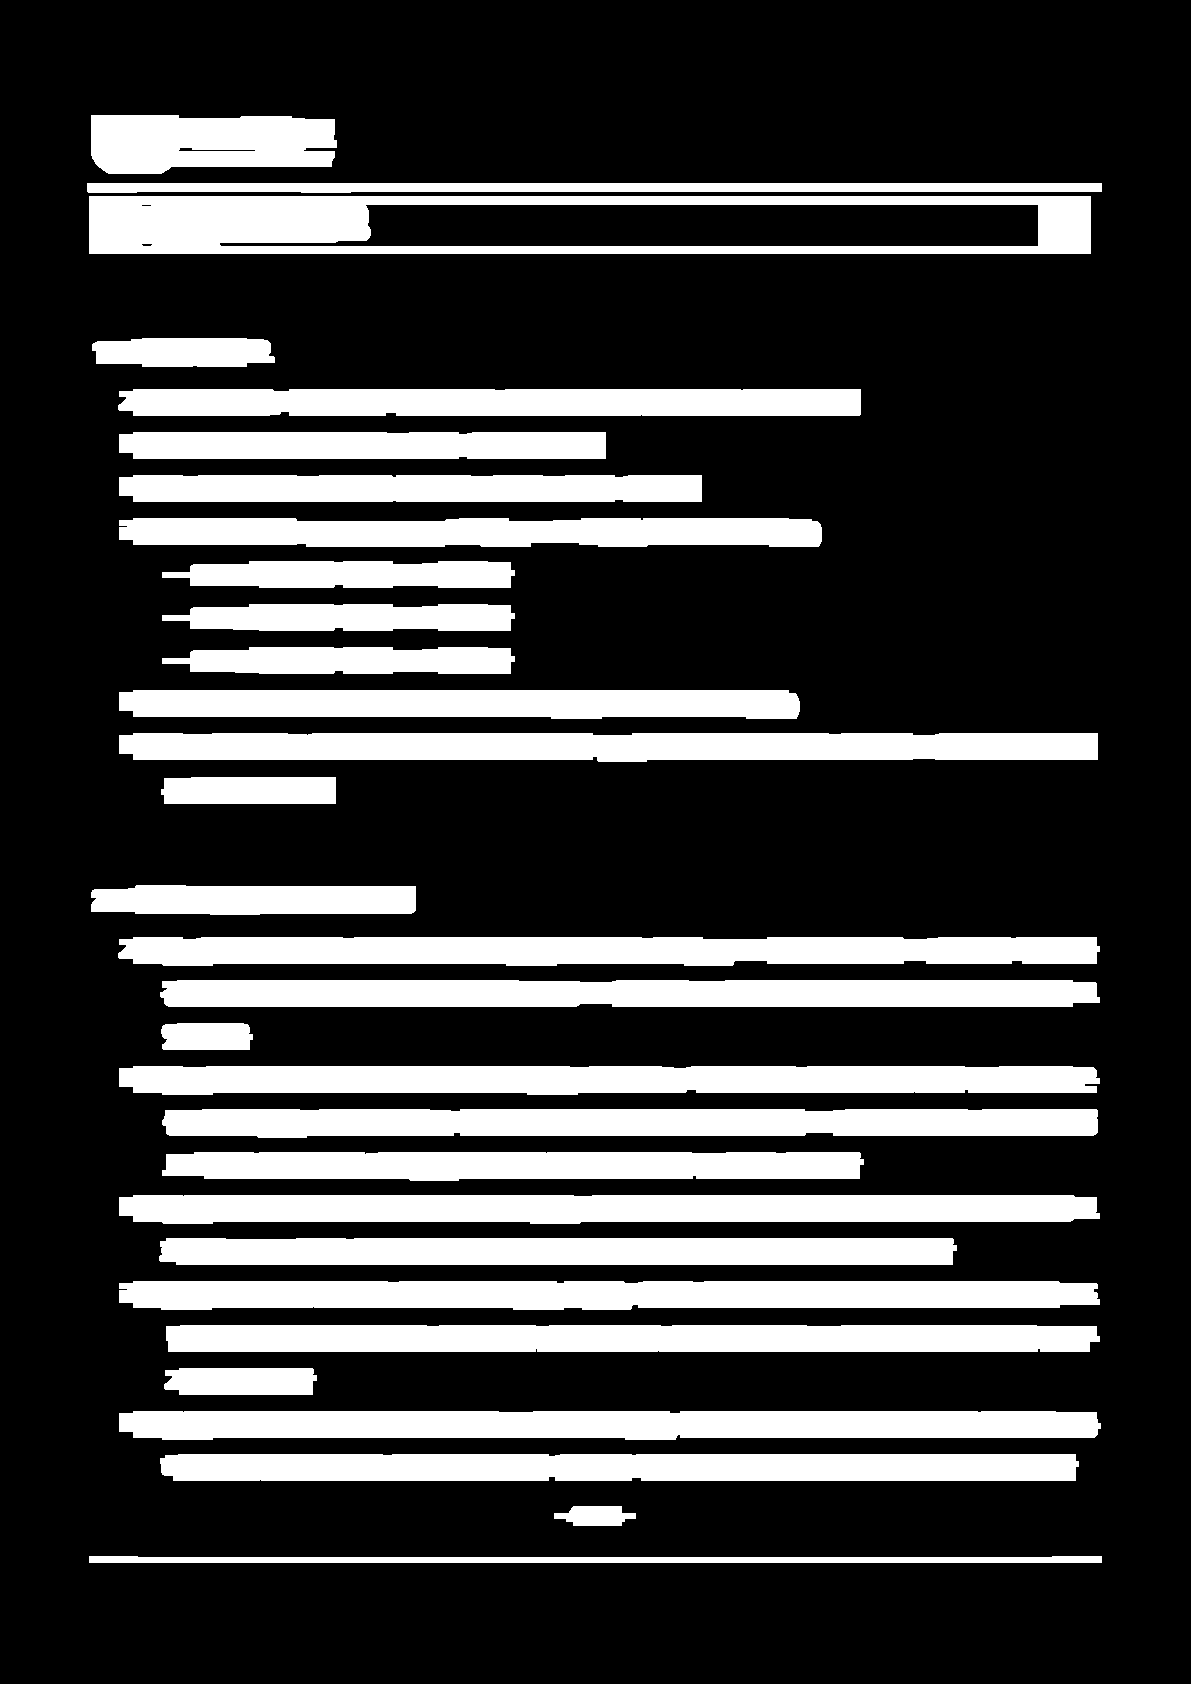

In [17]:
# OpenCV 이미지를 PNG 형식으로 인코딩
is_success, im_buf_arr = cv2.imencode(".png", dilated)
if is_success:
    byte_im = im_buf_arr.tobytes()

    # PNG 이미지 데이터를 사용하여 Image 객체 생성 및 표시
    display(Image(data=byte_im, format='png'))
else:
    print("이미지 인코딩에 실패했습니다.")

dilated는 흑백 반전되어 있으므로 아래의 코드를 실행하여 흑백 반전한 후 _detect_text_regions_advanced 메써드의 코드를 실행하여 text_regions를 추출합니다. (binary도 반전되어있으므로 다시 반전시키는 코드를 추가합니다.)

In [18]:
dilated = cv2.bitwise_not(dilated)

In [19]:
binary = cv2.bitwise_not(binary)

In [20]:
# 3. 컨투어 찾기
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

regions = []
img_area = image.shape[0] * image.shape[1]
min_area = max(500, img_area * 0.001)  # 최소 면적을 이미지 크기에 비례하여 설정
max_area = img_area * 0.8

for contour in contours:
    area = cv2.contourArea(contour)
    binary = cv2.bitwise_not(binary) ### binary 현재 흑, 백 반전되어 있음.
    if min_area < area < max_area:
        x, y, w, h = cv2.boundingRect(contour)

        # 더 엄격한 필터링
        aspect_ratio = w / h
        if (0.1 < aspect_ratio < 20 and  # 가로세로 비율
            w > 50 and h > 20 and        # 최소 크기
            w < image.shape[1] * 0.95 and h < image.shape[0] * 0.95):  # 최대 크기
            # 텍스트 영역인지 추가 검증
            roi = binary[y:y+h, x:x+w]
            text_pixel_ratio = np.sum(roi == 0) / (w * h)

            if 0.05 < text_pixel_ratio < 0.8:  # 적당한 텍스트 밀도

                regions.append({
                    'bbox': (x, y, x+w, y+h),
                    'area': area,
                    'aspect_ratio': aspect_ratio,
                    'contour': contour,
                    'text_density': text_pixel_ratio
                })

# 면적 순으로 정렬
regions.sort(key=lambda x: x['area'], reverse=True)

In [21]:
contours

(array([[[   0,    0]],
 
        [[   0, 1683]],
 
        [[1190, 1683]],
 
        [[1190,    0]]], dtype=int32),)

contours가 큰 영역 하나 밖에 찾아지지 않았음을 확인했습니다. 찾아보니 cv2.findContours 함수는 흰색을 물체로 인식하여 contour를 찾는다고 합니다. dilated를 다시 한번 흑백 반전시켜서 cv2.findContours에 넣어 contours를 찾고 이후 regions를 추출합니다.

In [22]:
dilated = cv2.bitwise_not(dilated)

In [23]:
# 3. 컨투어 찾기
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

regions = []
img_area = image.shape[0] * image.shape[1]
min_area = max(500, img_area * 0.001)  # 최소 면적을 이미지 크기에 비례하여 설정
max_area = img_area * 0.8

for contour in contours:
    area = cv2.contourArea(contour)
    binary = cv2.bitwise_not(binary) ### binary 현재 흑, 백 반전되어 있음.
    if min_area < area < max_area:
        x, y, w, h = cv2.boundingRect(contour)

        # 더 엄격한 필터링
        aspect_ratio = w / h
        if (0.1 < aspect_ratio < 20 and  # 가로세로 비율
            w > 50 and h > 20 and        # 최소 크기
            w < image.shape[1] * 0.95 and h < image.shape[0] * 0.95):  # 최대 크기
            # 텍스트 영역인지 추가 검증
            roi = binary[y:y+h, x:x+w]
            text_pixel_ratio = np.sum(roi == 0) / (w * h)

            if 0.05 < text_pixel_ratio < 0.8:  # 적당한 텍스트 밀도

                regions.append({
                    'bbox': (x, y, x+w, y+h),
                    'area': area,
                    'aspect_ratio': aspect_ratio,
                    'contour': contour,
                    'text_density': text_pixel_ratio
                })

# 면적 순으로 정렬
regions.sort(key=lambda x: x['area'], reverse=True)

contours가 잘 추출되었는지 확인하기 위해서 원래 이미지 위에 contour들을 빨간색으로 표시하여 출력합니다.

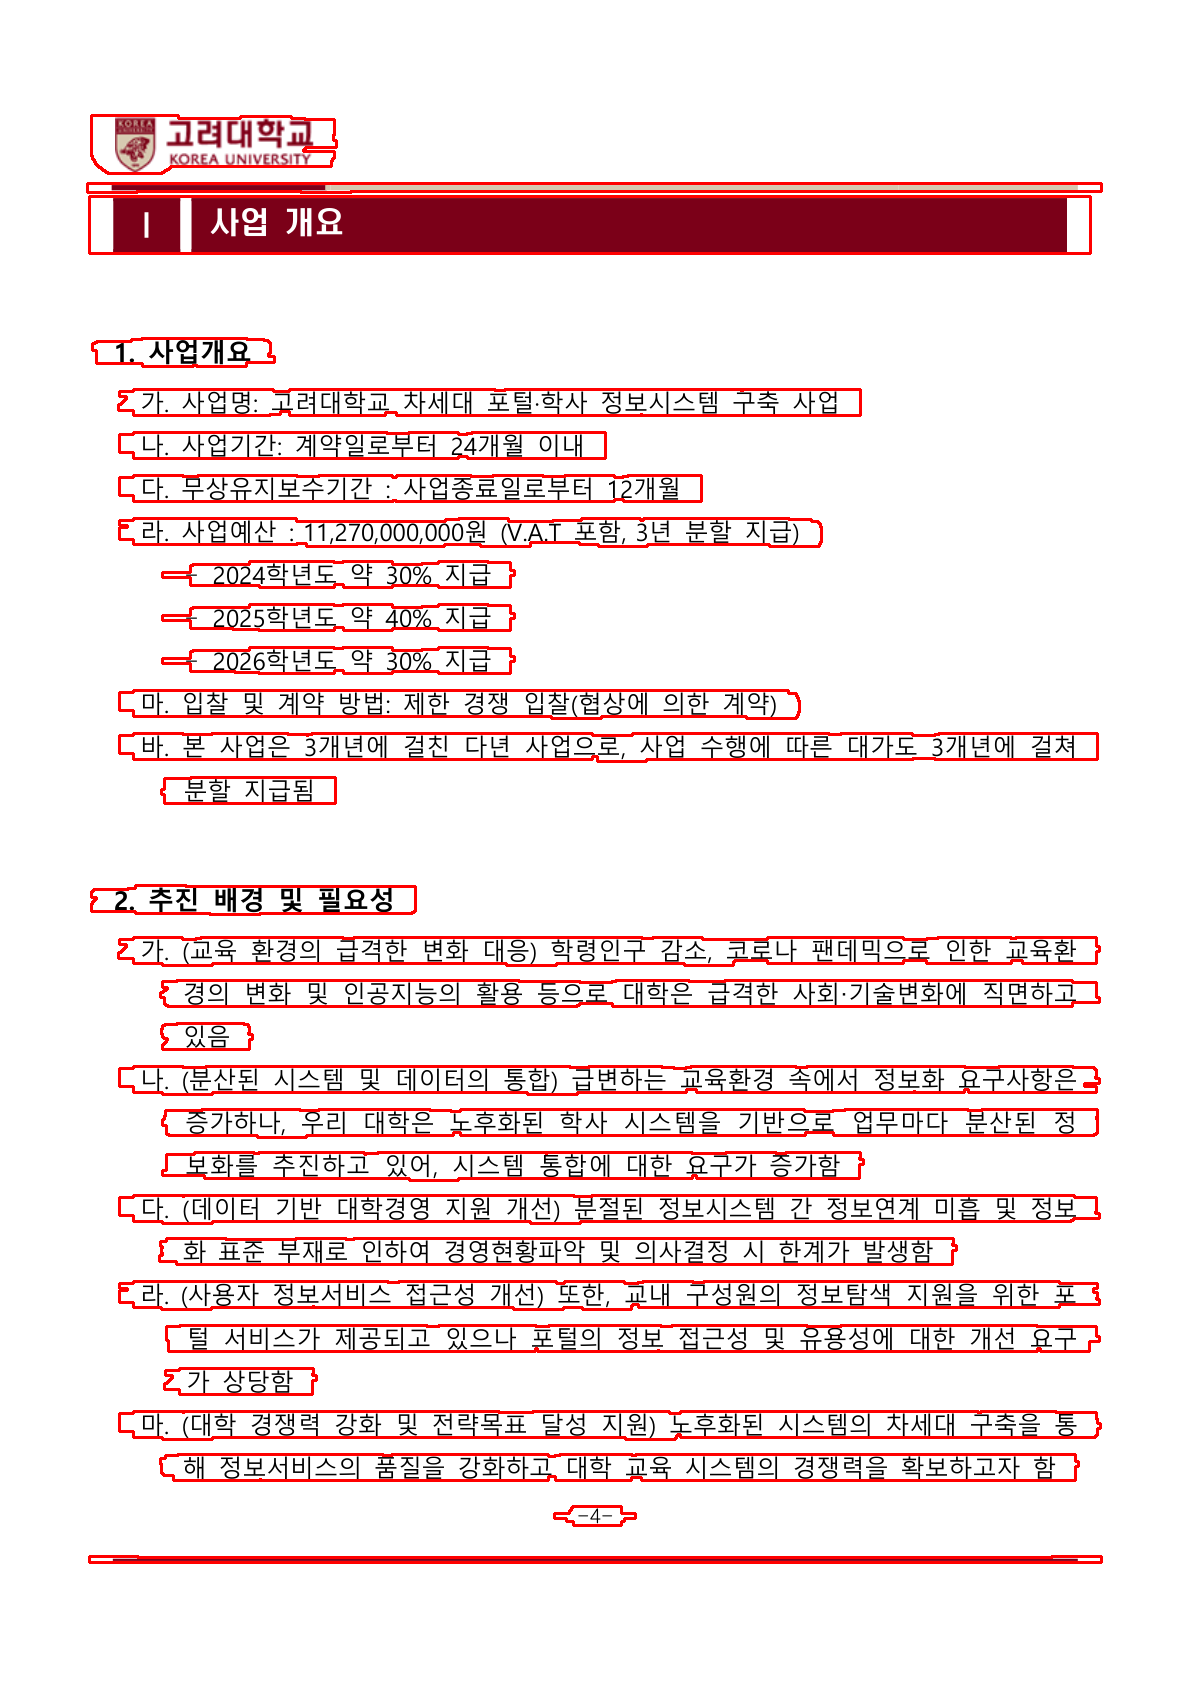

In [24]:
# 원본 이미지 복사 (그리기 위한 새로운 이미지)
image_with_contours = image.copy()

# 찾은 컨투어들을 이미지에 빨간색으로 그리기
# -1: 모든 컨투어 그리기, (0, 0, 255): 빨간색, 2: 선 두께
cv2.drawContours(image_with_contours, contours, -1, (0, 0, 255), 2)

# 결과 이미지 표시
is_success, im_buf_arr = cv2.imencode(".png", image_with_contours)
if is_success:
    byte_im = im_buf_arr.tobytes()
    display(Image(data=byte_im, format='png'))
else:
    print("이미지 인코딩에 실패했습니다.")

regions도 출력해봅니다. contours는 상당히 잘 찾아졌으나 regions는 필터링 과정에서 상당히 많이 줄어들었음을 알 수 있습니다.

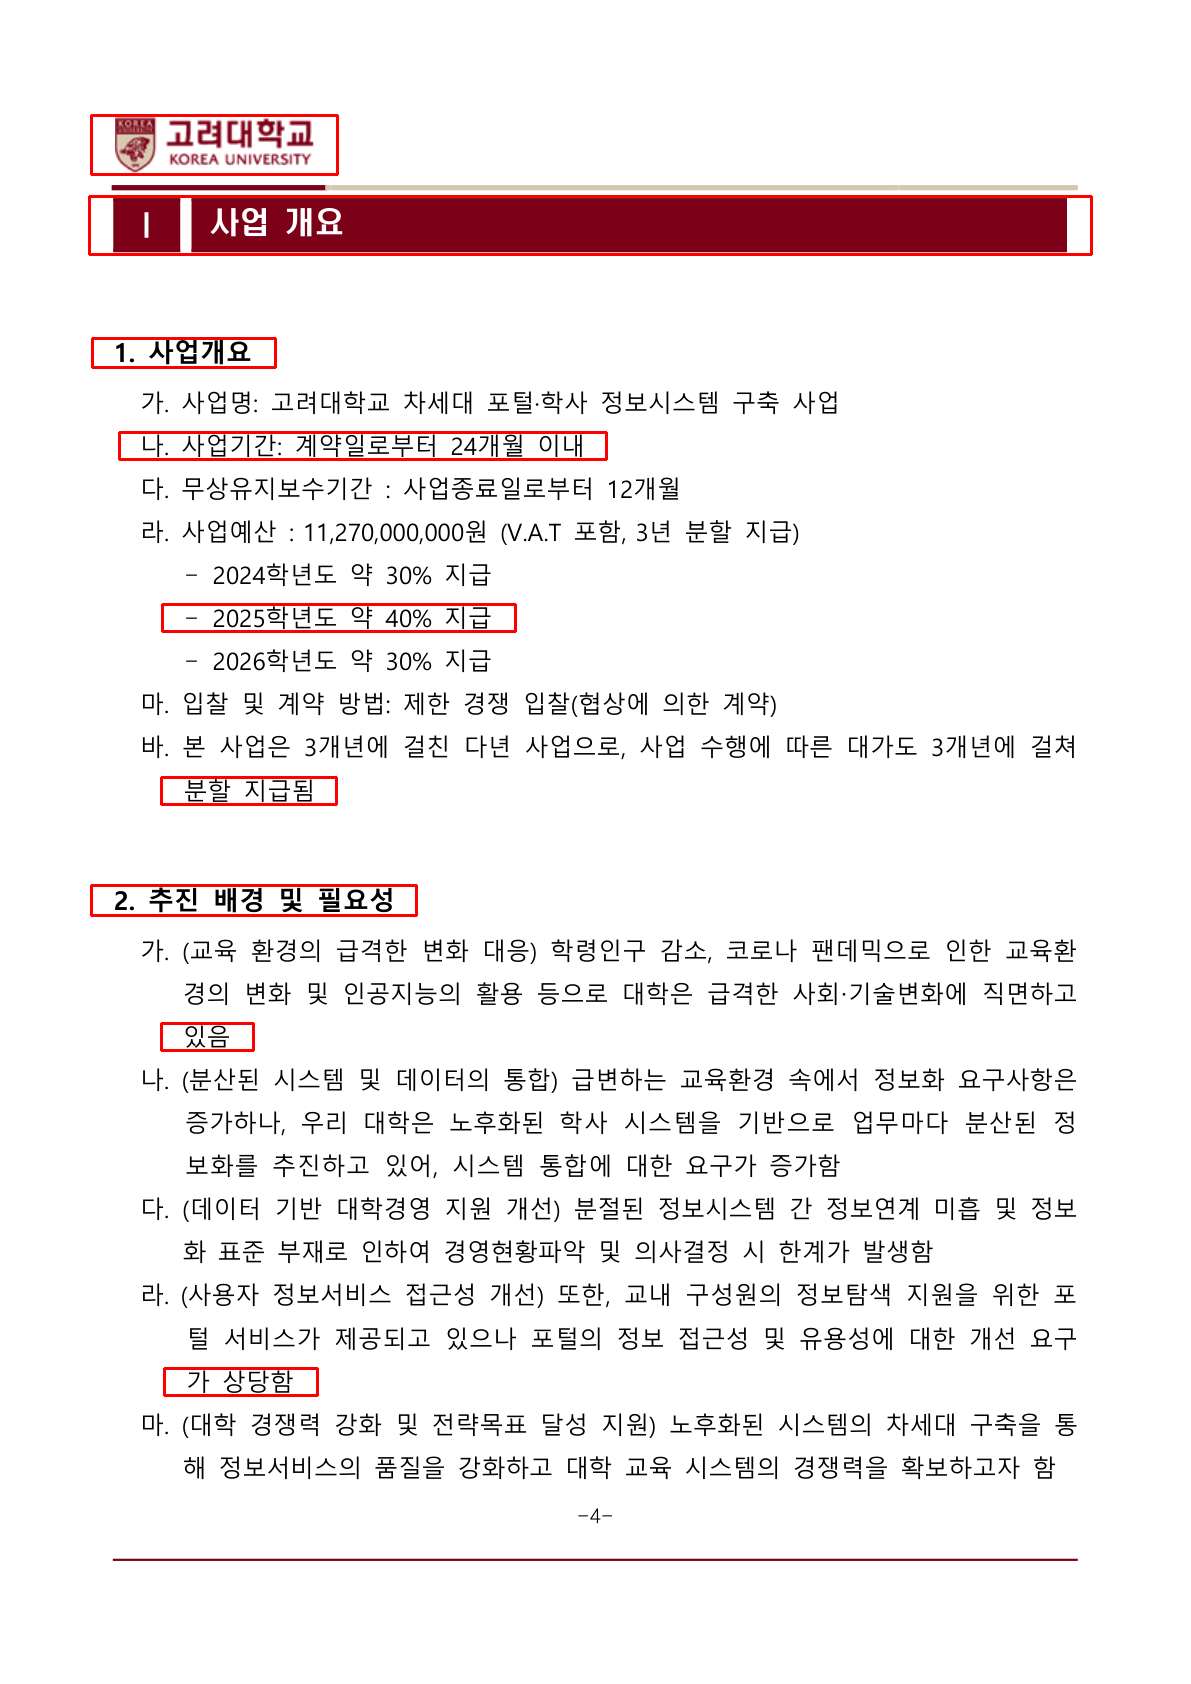

In [25]:
# 원본 이미지 복사 (그리기 위한 새로운 이미지)
image_with_regions = image.copy()

# regions 리스트에 있는 박스들을 빨간색으로 그리기
for region in regions:
    x1, y1, x2, y2 = region['bbox']
    cv2.rectangle(image_with_regions, (x1, y1), (x2, y2), (0, 0, 255), 2) # 빨간색 (BGR 형식)

# 결과 이미지 표시
is_success, im_buf_arr = cv2.imencode(".png", image_with_regions)
if is_success:
    byte_im = im_buf_arr.tobytes()
    display(Image(data=byte_im, format='png'))
else:
    print("이미지 인코딩에 실패했습니다.")

_detect_text_regions_advanced 메써드에서 필터링을 어느 정도 유지할지도 중요한 이슈가 될 것 같습니다. 일단은 가로세로 비율만 유지(0.1 < aspect_ratio < 20 -> 100)하고 나머지 필터링은 제외하였습니다.

In [40]:
# region 찾기
regions = []
img_area = image.shape[0] * image.shape[1]
min_area = max(500, img_area * 0.001)  # 최소 면적을 이미지 크기에 비례하여 설정
max_area = img_area * 0.8

for contour in contours:
    area = cv2.contourArea(contour)
    binary = cv2.bitwise_not(binary) ### binary 현재 흑, 백 반전되어 있음.
    x, y, w, h = cv2.boundingRect(contour)
    aspect_ratio = w / h
    if (0.1 < aspect_ratio < 100):  # 가로세로 비율 -> 이 필터링만 유지
        regions.append({
            'bbox': (x, y, x+w, y+h),
            'area': area,
            'aspect_ratio': aspect_ratio,
            'contour': contour,
            'text_density': text_pixel_ratio
        })

# 면적 순으로 정렬
regions.sort(key=lambda x: x['area'], reverse=True)

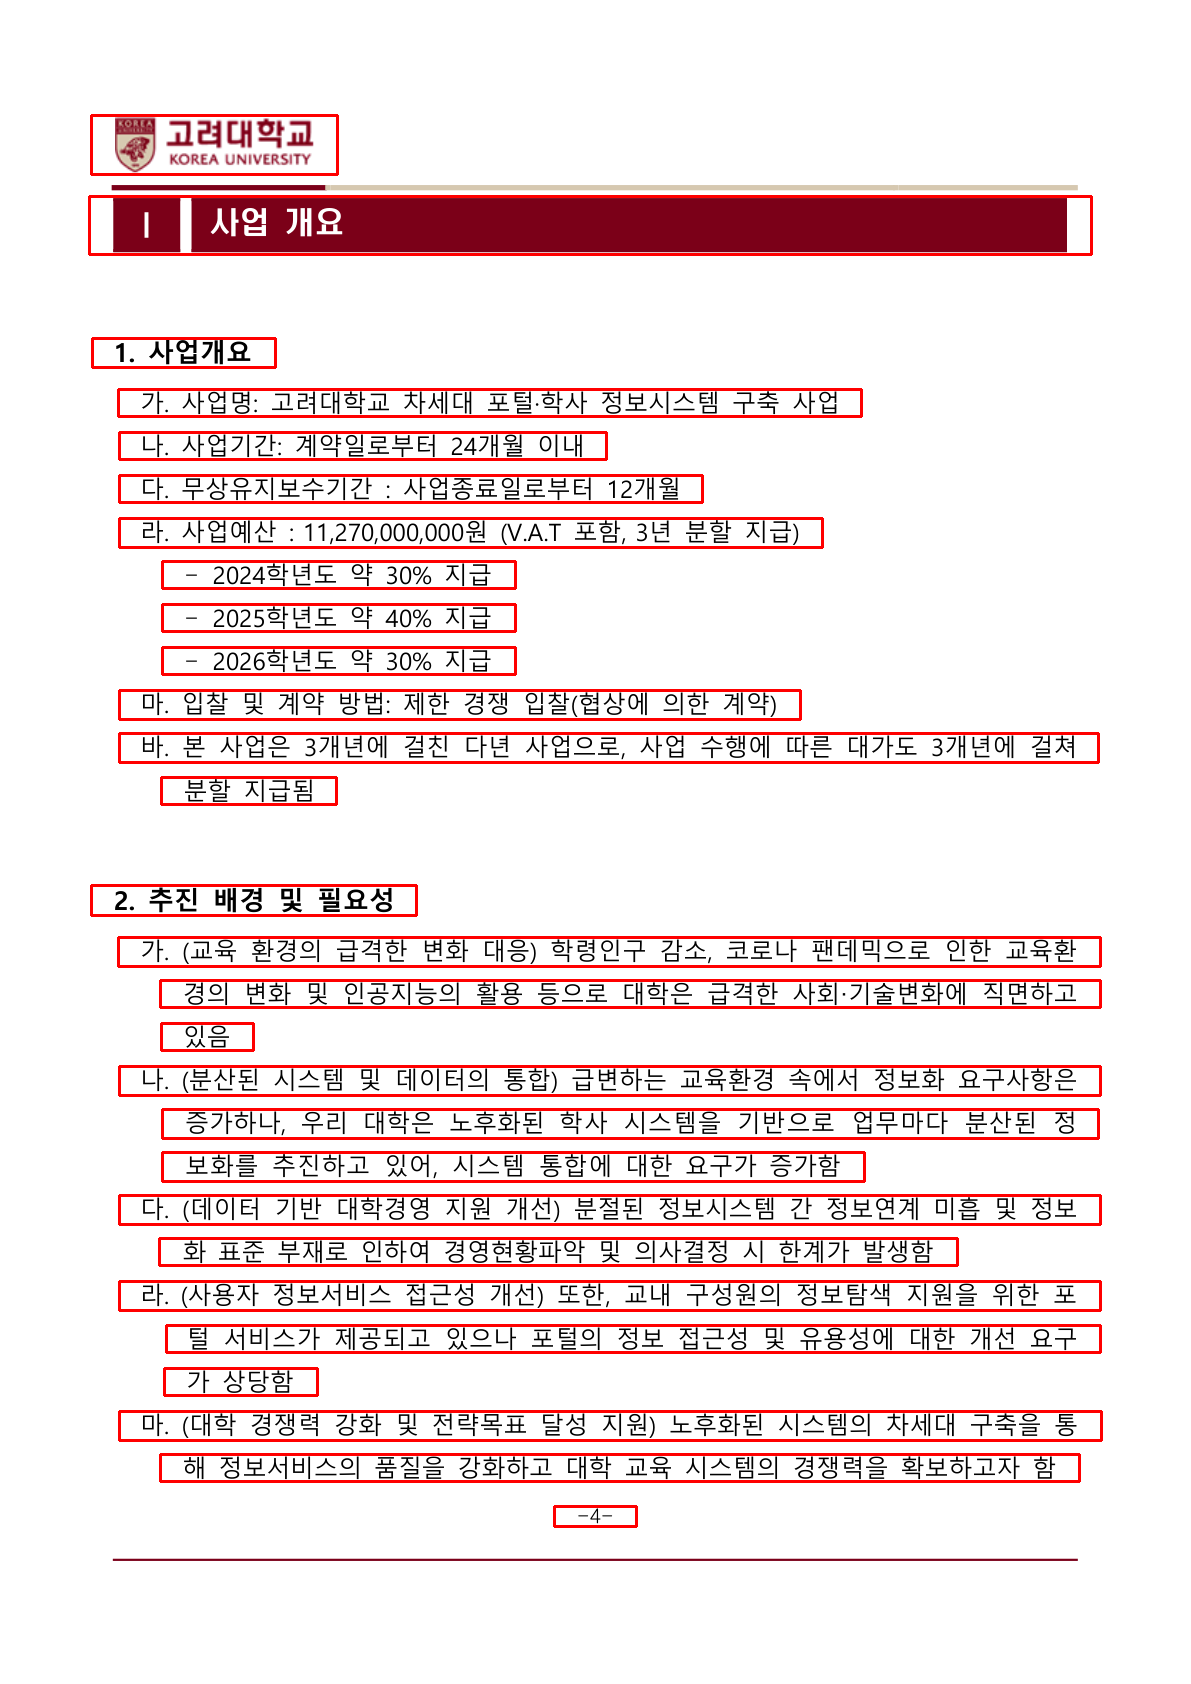

In [41]:
# 원본 이미지 복사 (그리기 위한 새로운 이미지)
image_with_regions = image.copy()

# regions 리스트에 있는 박스들을 빨간색으로 그리기
for region in regions:
    x1, y1, x2, y2 = region['bbox']
    cv2.rectangle(image_with_regions, (x1, y1), (x2, y2), (0, 0, 255), 2) # 빨간색 (BGR 형식)

# 결과 이미지 표시
is_success, im_buf_arr = cv2.imencode(".png", image_with_regions)
if is_success:
    byte_im = im_buf_arr.tobytes()
    display(Image(data=byte_im, format='png'))
else:
    print("이미지 인코딩에 실패했습니다.")

이어서 각 영역에 대해서 OCR 및 분류 수행하는 부분을 실행해보겠습니다.

In [43]:
text_regions = regions

In [44]:
# 2. 각 영역에 대해 OCR 및 분류 수행
elements = []
for i, region in enumerate(text_regions):
    element = analyzer._analyze_region(image, region, i)
    if element:
        elements.append(element)

OCR 결과 글자 상당수 인식이 안되거나 잘못 인식된 부분들이 있습니다.

In [52]:
for i in range(len(elements)):
    print("element_type: ", elements[i].element_type, "text_content: ", elements[i].text_content)

element_type:  text text_content:  사업 개요
element_type:  text text_content:  마  (대학   경생력 강화 및 노후회된 시스템의 사세대 구축올 동
element_type:  text text_content:  다  (데이터 기반 대학 경영   지원 개신) 분절된 성보시스템 간 성보언계 미혼 및 정보
element_type:  text text_content:  라. (사용자 정보서비 ^ 교내 구성원의   정보담색   지원올 위한 모
element_type:  text text_content:  시스템 및 데이터의 동합) 급변하는 교유환경 속에서 정보화 요구사항은
element_type:  text text_content:  바  본 사업은 3개년에 결친 다년 사업으로 사업 수형에 따른 대가노 3개년에 걸서
element_type:  text text_content:  급격한   변화 대응) 편데의으로 인한
element_type:  text text_content:  중 가하다 우리 대학은 노후화된 학사 시스템올 기반으로 업무마다 정
element_type:  text text_content:  제공되고 유용성에 대한 개신 요구
element_type:  text text_content:  경의 변화 및 인공지능의 대학은 급격한 직면하고
element_type:  text text_content:  해   정보서비스의 품질올 강화하고   대학 시스템의 경생력올 화보하고자 함
element_type:  text text_content:  화 표준 부재로 인하여 경영현화파악 및 의사결정 시 한계가 발생함
element_type:  text text_content:  가  사업명: 고려대학 i 사세대 프학사 정보시스템 구축 사업
element_type:  text text_content:  추신하고 있어 시스템 동합에 대한 요구가 증기함
element_type:  text text_content:  라  사업

OCR 추출이 잘 안된 1. 사업개요의 '나.~' 열의 bbox값을 x1, y1, x2, y2로 하여 _extract_text_ocr 메써드 안의 코드를 직접 실행해보겠습니다.

In [48]:
ocr_reader = easyocr.Reader(['ko', 'en'], gpu=torch.cuda.is_available() if TORCH_AVAILABLE else False)

In [53]:
x1, y1, x2, y2 = 119, 432, 606, 459
roi = image[y1:y2, x1:x2]

In [54]:
# 이미지 전처리
processed_roi = analyzer._preprocess_for_ocr(roi)

In [55]:
# processed_roi를 PNG 형식으로 인코딩
is_success, im_buf_arr = cv2.imencode(".png", processed_roi)
if is_success:
    byte_im = im_buf_arr.tobytes()

    # PNG 이미지 데이터를 사용하여 Image 객체 생성 및 표시
    display(Image(data=byte_im, format='png'))
else:
    print("이미지 인코딩에 실패했습니다.")

In [56]:
# EasyOCR 실행
results = ocr_reader.readtext(processed_roi, detail=1)


ocr_reader로 processed_roi를 읽은 결과 '나. 사업기간: 계약일로부터 24개월'이 '11 사업기간: 계약일로부터 24개원'으로 읽혔으나 confidence가 0.32로 0.5보다 작아서 최종출력에서 제외되었음을 확인했습니다. 필터링할 conf를 어떻게 조정해야 할지와 기존 OCR 방식을 개선할 방안을 고민해 봐야 할 것 같습니다.  

In [57]:
results

[([[np.int32(19), 0],
   [np.int32(408), 0],
   [np.int32(408), 27],
   [np.int32(19), 27]],
  '11 사업기간: 계악일로부터 24개원',
  np.float64(0.328549304158374)),
 ([[np.int32(415), 0],
   [np.int32(468), 0],
   [np.int32(468), np.int32(26)],
   [np.int32(415), np.int32(26)]],
  '이내',
  np.float64(0.9995847102162981))]

In [ ]:
# 결과 통합
texts = []
confidences = []

for bbox, text, conf in results:
    if conf > 0.5:  # 신뢰도 50% 이상만 사용
        texts.append(text.strip())
        confidences.append(conf)

combined_text = " ".join(texts)
avg_confidence = np.mean(confidences)
